In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import missingno as mso
import datetime as datetime
import calendar
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from scipy import stats
from scipy.stats import norm, skew #for some statistics

from sklearn.model_selection import cross_val_score,KFold , RandomizedSearchCV,train_test_split,GridSearchCV
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost.sklearn import XGBRegressor
from xgboost import plot_importance
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.grid_search import GridSearchCV   #Perforing grid search
from scipy.stats import skew
from collections import OrderedDict


In [2]:
file1 = "/Users/1535/OneDrive - Xceedance Consulting India Private Ltd/Gazal Xceedance/EDV/Python/Python Projects/Project 3/counterfeit_train.csv"
cft_train=pd.read_csv(file1)

file2 = "/Users/1535/OneDrive - Xceedance Consulting India Private Ltd/Gazal Xceedance/EDV/Python/Python Projects/Project 3/counterfeit_test.csv"
cft_test=pd.read_csv(file2)

In [3]:
#check the numbers of samples and features
print("The train data size before adding data column is         : {} ".format(cft_train.shape))
print("The test data size before adding data & target column is : {} ".format(cft_test.shape))

The train data size before adding data column is         : (6818, 12) 
The test data size before adding data & target column is : (1705, 11) 


In [4]:
# combine the two datasets to pre-process the data together since the data on which the model is trained should
# undergo the same preprocessing as the data on which the predictions are made

cft_train['data'] = 'Train'
cft_test['data'] = 'Test'

cft_test['Counterfeit_Sales'] = np.nan

In [5]:
#check the numbers of samples and features
print("The train data size after adding data column is         : {} ".format(cft_train.shape))
print("The test data size after adding data & target column is : {} ".format(cft_test.shape))

The train data size after adding data column is         : (6818, 13) 
The test data size after adding data & target column is : (1705, 13) 


In [6]:
cft_test=cft_test[cft_train.columns] # the columns in the two data frames should be in the same order to enable concatenation

cft_all=pd.concat([cft_train,cft_test],axis=0)

cft_all.reset_index(drop=True,inplace=True)

In [7]:
print("Total data size after combination of Train & Test: {} ".format(cft_all.shape))

Total data size after combination of Train & Test: (8523, 13) 


In [8]:
cft_all.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,data
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026,Train
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520,Train
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920,Train
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130,Train
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402,Train


In [9]:
cft_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
Medicine_ID            8523 non-null object
Counterfeit_Weight     7060 non-null float64
DistArea_ID            8523 non-null object
Active_Since           8523 non-null int64
Medicine_MRP           8523 non-null float64
Medicine_Type          8523 non-null object
SidEffect_Level        8523 non-null object
Availability_rating    8523 non-null float64
Area_Type              8523 non-null object
Area_City_Type         8523 non-null object
Area_dist_level        8523 non-null object
Counterfeit_Sales      6818 non-null float64
data                   8523 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 865.7+ KB


In [10]:
cft_all.describe()

,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,6818.000000
mean,14.157645,1995.831867,151.292782,0.079132,2280.583480
std,4.643456,8.371760,62.275067,0.051598,1693.354404
min,5.855000,1983.000000,41.590000,0.013000,146.290000
25%,10.073750,1985.000000,104.126500,0.039989,933.265600
50%,13.900000,1997.000000,153.312800,0.066931,1902.670400
75%,18.150000,2002.000000,195.943700,0.107585,3207.638400
max,22.650000,2007.000000,277.188400,0.341391,13199.964800


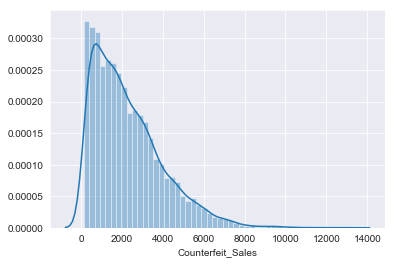

In [50]:
target = cft_train['Counterfeit_Sales']
sns.distplot(target)#density plot

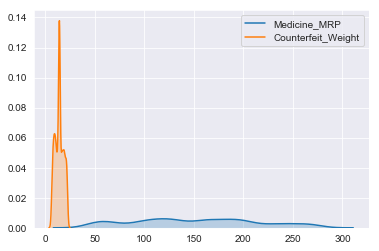

In [52]:
sns.kdeplot(cft_train['Medicine_MRP'], shade=True)
sns.kdeplot(cft_train['Counterfeit_Weight'], shade=True);

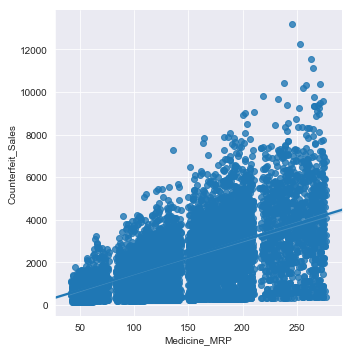

In [53]:
sns.lmplot('Medicine_MRP', 'Counterfeit_Sales', 
           data=cft_train,palette="Set1")
# lmplot function by default gives a regression line (linear relationship) between the two variables

In [58]:
sns.lmplot('Medicine_MRP', 'Counterfeit_Sales', hue="SidEffect_Level",col="Area_Type",data=cft_train,fit_reg=False,size=3)

KeyError: "['Area_Type'] not in index"

In [11]:
cft_all.isnull().sum()

Medicine_ID               0
Counterfeit_Weight     1463
DistArea_ID               0
Active_Since              0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Area_dist_level           0
Counterfeit_Sales      1705
data                      0
dtype: int64

Counterfeit_Sales : 1705 is target variable which we added in test and kept Null values. 
Counterfeit_Weight missing value will be treated as mean across 

In [12]:
all_data_na = (cft_all.isnull().sum() / len(cft_all)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
Counterfeit_Sales,20.004693
Counterfeit_Weight,17.165317


In [13]:
for col in cft_all.select_dtypes(['object']).columns:
    print(col,':',cft_all[col].nunique())

Medicine_ID : 1557
DistArea_ID : 10
Medicine_Type : 16
SidEffect_Level : 2
Area_Type : 4
Area_City_Type : 3
Area_dist_level : 4
data : 2


In [14]:
cft_all['Medicine_Type'].value_counts()

Antibiotics           1232
Hreplacements         1200
Antiseptics            910
OralContraceptives     856
Antipyretics           682
Cardiac                649
Mstablizers            648
Tranquilizers          520
Analgesics             445
Antimalarial           425
Antacids               251
Statins                214
MuscleRelaxants        169
Antifungal             148
Stimulants             110
Antiviral               64
Name: Medicine_Type, dtype: int64

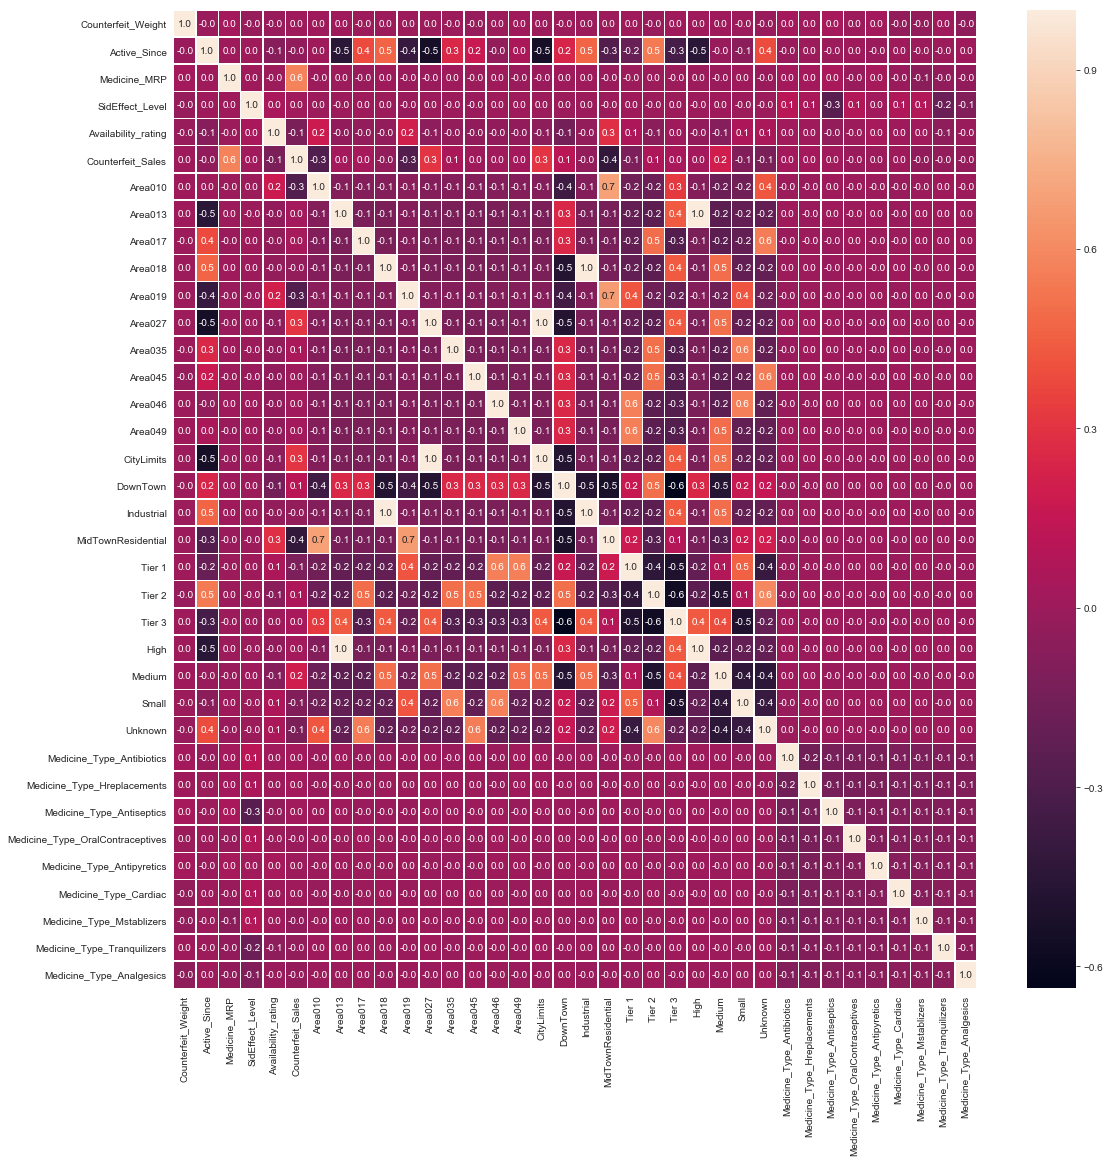

In [67]:
#sns.boxplot(x='Counterfeit_Sales', y='SidEffect_Level', data=cft_all)

#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(cft_all.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

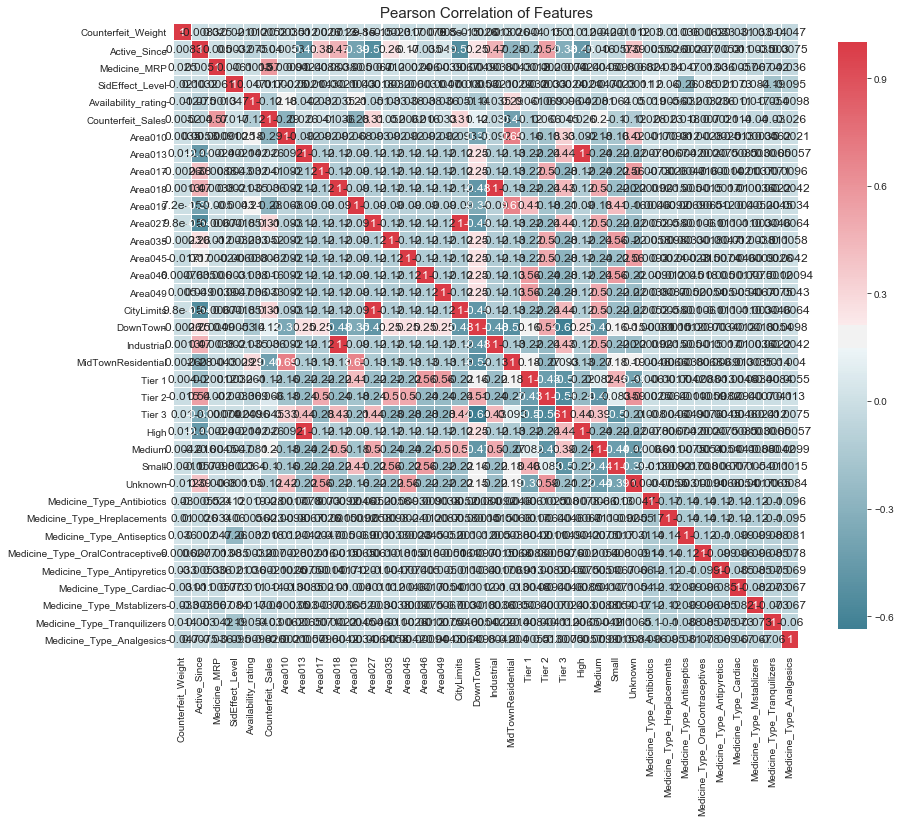

In [68]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(cft_all)


In [15]:
cft_all['SidEffect_Level'].value_counts()

mild        5517
critical    3006
Name: SidEffect_Level, dtype: int64

In [16]:
cft_all['SidEffect_Level'] = np.where(cft_all['SidEffect_Level']=='mild',0,1)

# Treating 'DistArea_ID' coulumn and creating dummies

In [17]:
cft_all['DistArea_ID'].value_counts()

Area027    935
Area013    932
Area049    930
Area035    930
Area046    930
Area045    929
Area018    928
Area017    926
Area010    555
Area019    528
Name: DistArea_ID, dtype: int64

In [18]:
Area_Dummies = pd.get_dummies(cft_all['DistArea_ID'])
del cft_all['DistArea_ID'] # dropping column
Area_Dummies.head()

,Area010,Area013,Area017,Area018,Area019,Area027,Area035,Area045,Area046,Area049
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0


In [19]:
cft_all = pd.concat([cft_all,Area_Dummies],axis = 1)
cft_all.head()

,Medicine_ID,Counterfeit_Weight,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,...,Area010,Area013,Area017,Area018,Area019,Area027,Area035,Area045,Area046,Area049
0,RRA15,13.100,1995,160.2366,Antimalarial,1,0.070422,DownTown,Tier 1,Small,...,0,0,0,0,0,0,0,0,1,0
1,YVV26,NaN,1983,110.4384,Mstablizers,0,0.013000,CityLimits,Tier 3,Medium,...,0,0,0,0,0,1,0,0,0,0
2,LJC15,9.025,1995,259.4092,Cardiac,0,0.060783,DownTown,Tier 1,Small,...,0,0,0,0,0,0,0,0,1,0
3,GWC40,11.800,1995,99.9830,OralContraceptives,0,0.065555,DownTown,Tier 1,Small,...,0,0,0,0,0,0,0,0,1,0
4,QMN13,NaN,1983,56.4402,Hreplacements,1,0.248859,MidTownResidential,Tier 1,Small,...,0,0,0,0,1,0,0,0,0,0


Area_Type Dummy creation

In [20]:
print(cft_all['Area_Type'].value_counts())
AreaType_Dummies = pd.get_dummies(cft_all['Area_Type'])
cft_all = pd.concat([cft_all,AreaType_Dummies],axis = 1)

del cft_all['Area_Type'] # dropping column
cft_all.head()

DownTown              5577
MidTownResidential    1083
CityLimits             935
Industrial             928
Name: Area_Type, dtype: int64


,Medicine_ID,Counterfeit_Weight,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_City_Type,Area_dist_level,Counterfeit_Sales,...,Area019,Area027,Area035,Area045,Area046,Area049,CityLimits,DownTown,Industrial,MidTownResidential
0,RRA15,13.100,1995,160.2366,Antimalarial,1,0.070422,Tier 1,Small,1775.5026,...,0,0,0,0,1,0,0,1,0,0
1,YVV26,NaN,1983,110.4384,Mstablizers,0,0.013000,Tier 3,Medium,3069.1520,...,0,1,0,0,0,0,1,0,0,0
2,LJC15,9.025,1995,259.4092,Cardiac,0,0.060783,Tier 1,Small,2603.0920,...,0,0,0,0,1,0,0,1,0,0
3,GWC40,11.800,1995,99.9830,OralContraceptives,0,0.065555,Tier 1,Small,1101.7130,...,0,0,0,0,1,0,0,1,0,0
4,QMN13,NaN,1983,56.4402,Hreplacements,1,0.248859,Tier 1,Small,158.9402,...,1,0,0,0,0,0,0,0,0,1


In [21]:
cft_all.groupby('Medicine_Type')['Counterfeit_Weight'].mean()

Medicine_Type
Analgesics            13.147460
Antacids              12.646936
Antibiotics           14.524769
Antifungal            14.990731
Antimalarial          14.117344
Antipyretics          14.726069
Antiseptics           14.684736
Antiviral             13.852843
Cardiac               13.605705
Hreplacements         14.287880
Mstablizers           13.577108
MuscleRelaxants       15.153285
OralContraceptives    14.167061
Statins               12.700328
Stimulants            14.068202
Tranquilizers         14.442314
Name: Counterfeit_Weight, dtype: float64

In [22]:
cft_all['Counterfeit_Weight'].mean()

14.15764518413612

In [23]:
cft_all['Counterfeit_Weight'] = cft_all['Counterfeit_Weight'].fillna(cft_all['Counterfeit_Weight'].mean())

In [24]:
#area type has the highest number of counterfiet drugs?
cft_train.groupby('Area_Type')['Counterfeit_Sales'].sum()

Area_Type
CityLimits            2.772607e+06
DownTown              1.084975e+07
Industrial            1.535692e+06
MidTownResidential    3.909705e+05
Name: Counterfeit_Sales, dtype: float64

In [25]:
cft_train.groupby('Medicine_Type')['Counterfeit_Sales'].sum()

Medicine_Type
Analgesics            7.444819e+05
Antacids              4.655350e+05
Antibiotics           2.325286e+06
Antifungal            2.712902e+05
Antimalarial          7.433200e+05
Antipyretics          1.228900e+06
Antiseptics           1.713413e+06
Antiviral             1.265748e+05
Cardiac               1.233477e+06
Hreplacements         2.319091e+06
Mstablizers           1.051063e+06
MuscleRelaxants       2.906618e+05
OralContraceptives    1.558180e+06
Statins               3.856775e+05
Stimulants            2.165970e+05
Tranquilizers         8.754689e+05
Name: Counterfeit_Sales, dtype: float64

In [26]:
cft_train['Counterfeit_Sales'].min()

146.29

Text(0, 0.5, 'Medicine_MRP')

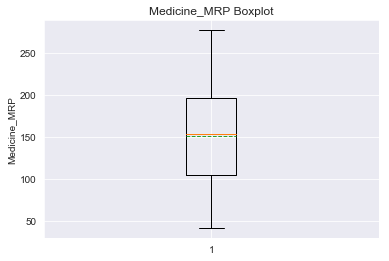

In [27]:
plt.boxplot(cft_train['Medicine_MRP'], showmeans = True, meanline = True)
plt.title('Medicine_MRP Boxplot')
plt.ylabel('Medicine_MRP')

In [28]:
cft_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 25 columns):
Medicine_ID            8523 non-null object
Counterfeit_Weight     8523 non-null float64
Active_Since           8523 non-null int64
Medicine_MRP           8523 non-null float64
Medicine_Type          8523 non-null object
SidEffect_Level        8523 non-null int32
Availability_rating    8523 non-null float64
Area_City_Type         8523 non-null object
Area_dist_level        8523 non-null object
Counterfeit_Sales      6818 non-null float64
data                   8523 non-null object
Area010                8523 non-null uint8
Area013                8523 non-null uint8
Area017                8523 non-null uint8
Area018                8523 non-null uint8
Area019                8523 non-null uint8
Area027                8523 non-null uint8
Area035                8523 non-null uint8
Area045                8523 non-null uint8
Area046                8523 non-null uint8
Area049             

In [29]:
for col in cft_all.select_dtypes(['object']).columns:
    print(col,':',cft_all[col].nunique())

Medicine_ID : 1557
Medicine_Type : 16
Area_City_Type : 3
Area_dist_level : 4
data : 2


In [30]:
print(cft_all['Medicine_Type'].value_counts())

Antibiotics           1232
Hreplacements         1200
Antiseptics            910
OralContraceptives     856
Antipyretics           682
Cardiac                649
Mstablizers            648
Tranquilizers          520
Analgesics             445
Antimalarial           425
Antacids               251
Statins                214
MuscleRelaxants        169
Antifungal             148
Stimulants             110
Antiviral               64
Name: Medicine_Type, dtype: int64


In [31]:
print(cft_all['Area_City_Type'].value_counts())
AreaCityType_Dummies = pd.get_dummies(cft_all['Area_City_Type'])
cft_all = pd.concat([cft_all,AreaCityType_Dummies],axis = 1)

del cft_all['Area_City_Type'] # dropping column

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Area_City_Type, dtype: int64


In [32]:
print(cft_all['Area_dist_level'].value_counts())
AreaDistLevel_Dummies = pd.get_dummies(cft_all['Area_dist_level'])
cft_all = pd.concat([cft_all,AreaDistLevel_Dummies],axis = 1)

del cft_all['Area_dist_level'] # dropping column

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Area_dist_level, dtype: int64


In [33]:
for col in ['Medicine_Type']:
    freqs=cft_all[col].value_counts()
    selected_cats=freqs.index[freqs>300][:-1]
    
    print(col)
    for cat in selected_cats:
        name=col+'_'+cat
        
        cft_all[name]=(cft_all[col]==cat).astype(int)
    del cft_all[col]

Medicine_Type


In [34]:
del cft_all['Medicine_ID'] # dropping column

In [35]:
cft_train = cft_all[cft_all['data'] == 'Train']

 # Select only those rows where the data column has the value 'train'


cft_test=cft_all[cft_all['data']=='Test']
cft_test.drop(['Counterfeit_Sales','data'],axis=1,inplace=True)

cft_train.drop(['data'],axis=1,inplace=True)

In [36]:
cft_train.reset_index(drop=True,inplace=True)
cft_test.reset_index(drop=True,inplace=True)

In [37]:
x=cft_train.drop(['Counterfeit_Sales'],1)
y=cft_train['Counterfeit_Sales']

In [38]:
x.shape

(6818, 35)

In [39]:
y.shape

(6818,)

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state = 42)

In [84]:
print(x_train.shape)
print(y_train.shape)

(5454, 35)
(5454,)


By Random Forest

In [46]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)

In [47]:
rf_model.fit(x_train,y_train)

[20:13:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

Feature ranking:
1. feature Counterfeit_Weight (0.454928)
2. feature Active_Since (0.188848)
3. feature Medicine_MRP (0.104808)
4. feature SidEffect_Level (0.058435)
5. feature Availability_rating (0.054653)
6. feature Area010 (0.019526)
7. feature Area013 (0.010318)
8. feature Area017 (0.010009)
9. feature Area018 (0.009136)
10. feature Area019 (0.008906)
11. feature Area027 (0.008036)
12. feature Area035 (0.006402)
13. feature Area045 (0.005376)
14. feature Area046 (0.004918)
15. feature Area049 (0.004391)
16. feature CityLimits (0.004229)
17. feature DownTown (0.004219)
18. feature Industrial (0.004126)
19. feature MidTownResidential (0.003999)
20. feature Tier 1 (0.003751)
21. feature Tier 2 (0.003662)
22. feature Tier 3 (0.003594)
23. feature High (0.003429)
24. feature Medium (0.003390)
25. feature Small (0.003188)
26. feature Unknown (0.002487)
27. feature Medicine_Type_Antibiotics (0.002473)
28. feature Medicine_Type_Hreplacements (0.002301)
29. feature Medicine_Type_Antiseptic

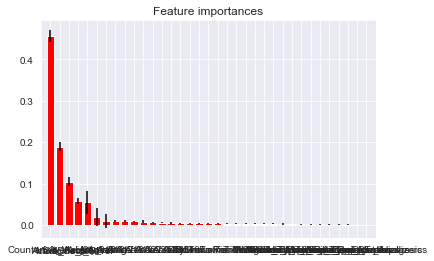

In [44]:
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, list(x_train.columns)[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), list(x_train.columns))
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [48]:
predicted= rf_model.predict(x_test)
residual= predicted-y_test


rmse_rf=np.sqrt(np.dot(residual,residual)/len(predicted))
print("RMSE of the model is                 : {} ".format(rmse_rf))

MAE = mean_absolute_error(y_test,predicted)
print("Mean Absolute Error of the model is     : {} ".format(MAE))

Edvancer_Score = 1-(MAE/1660)
print("Edvancer Required score of the model is : {} ".format(Edvancer_Score))

RMSE of the model is                 : 1073.1019232296742 
Mean Absolute Error of the model is     : 749.4818245305338 
Edvancer Required score of the model is : 0.5485049249816061 


In [87]:
xg_model = XGBRegressor(eval_metric='mae')

xgb_params = {  
                "learning_rate":[0.01,0.05,0.1,0.3,0.5],
                "gamma":[i/10.0 for i in range(0,5)],
                "max_depth": [2,3,4,5,6,7,8],
                "min_child_weight":[1,2,5,10],
                "max_delta_step":[0,1,2,5,10],
                "subsample":[i/10.0 for i in range(5,10)],
                "colsample_bytree":[i/10.0 for i in range(5,10)],
                "colsample_bylevel":[i/10.0 for i in range(5,10)],
                "reg_lambda":[1e-5, 1e-2, 0.1, 1, 100], 
                "reg_alpha":[1e-5, 1e-2, 0.1, 1, 100],
                "scale_pos_weight":[1,2,3,4,5,6,7,8,9],
                "n_estimators":[100,500,700,1000]
             }


n_iter=10

random_search=RandomizedSearchCV(xg_model,n_jobs=-1,verbose=3,cv=5,n_iter=n_iter,
                                 param_distributions=xgb_params)

random_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.2min finished


[00:04:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, eval_metric='mae', gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'max_depth': [2, 3, 4, 5, 6, 7, 8], 'min_child_weight': [1, 2, 5, 10], 'max_delta_step': [0, 1, 2, 5, 10], 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9], 'co....1, 1, 100], 'scale_pos_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'n_estimators': [100

In [88]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.576 (std: 0.02122)
Parameters: {'subsample': 0.8, 'scale_pos_weight': 6, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 8, 'max_delta_step': 0, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.5}

Model with rank: 2
Mean validation score: 0.391 (std: 0.02412)
Parameters: {'subsample': 0.9, 'scale_pos_weight': 2, 'reg_lambda': 0.01, 'reg_alpha': 0.01, 'n_estimators': 1000, 'min_child_weight': 10, 'max_depth': 5, 'max_delta_step': 0, 'learning_rate': 0.3, 'gamma': 0.1, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.9}

Model with rank: 3
Mean validation score: 0.218 (std: 0.01167)
Parameters: {'subsample': 0.9, 'scale_pos_weight': 9, 'reg_lambda': 1, 'reg_alpha': 100, 'n_estimators': 100, 'min_child_weight': 2, 'max_depth': 7, 'max_delta_step': 0, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.9}

Model with rank: 4
Mean val

In [89]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
       colsample_bynode=1, colsample_bytree=0.5, eval_metric='mae',
       gamma=0.3, importance_type='gain', learning_rate=0.05,
       max_delta_step=0, max_depth=8, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0.1, reg_lambda=0.1, scale_pos_weight=6,
       seed=None, silent=None, subsample=0.8, verbosity=1)

In [92]:
#after best parameter is learnt
xgb_best=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
       colsample_bynode=1, colsample_bytree=0.5, eval_metric='mae',
       gamma=0.3, importance_type='gain', learning_rate=0.05,
       max_delta_step=0, max_depth=8, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0.1, reg_lambda=0.1, scale_pos_weight=6,
       seed=None, silent=None, subsample=0.8, verbosity=1)

In [93]:
xgb_best.fit(x_train,y_train,eval_metric='mae')

[00:09:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
       colsample_bynode=1, colsample_bytree=0.5, eval_metric='mae',
       gamma=0.3, importance_type='gain', learning_rate=0.05,
       max_delta_step=0, max_depth=8, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0.1, reg_lambda=0.1, scale_pos_weight=6,
       seed=None, silent=None, subsample=0.8, verbosity=1)

In [94]:
predicted= xgb_best.predict(x_test)
residual= predicted-y_test


rmse_rf=np.sqrt(np.dot(residual,residual)/len(predicted))
print("RMSE of the model is                 : {} ".format(rmse_rf))

MAE = mean_absolute_error(y_test,predicted)
print("Mean Absolute Error of the model is     : {} ".format(MAE))

Edvancer_Score = 1-(MAE/1660)
print("Edvancer Required score of the model is : {} ".format(Edvancer_Score))

RMSE of the model is                 : 1083.074376777116 
Mean Absolute Error of the model is     : 758.5721835936962 
Edvancer Required score of the model is : 0.5430288050640384 


Submitting the score

In [96]:
xgb_best.fit(x,y,eval_metric='mae')
predictions= xgb_best.predict(cft_test)

[00:20:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [99]:
#pd.DataFrame(test_pred).to_csv("mysubmission.csv",index=False)
pd.DataFrame(predictions, columns=['Counterfeit_Sales']).to_csv('Project3_Part2 v 0.1.csv',index=False)

In [ ]:
#All algo
def print_results(self, model_name):
        if self.ml_for_analytics and model_name in ('LogisticRegression', 'RidgeClassifier', 'LinearRegression', 'Ridge'):
            self._print_ml_analytics_results_linear_model()

        elif self.ml_for_analytics and model_name in ['RandomForestClassifier', 'RandomForestRegressor', 'XGBClassifier', 'XGBRegressor', 'GradientBoostingRegressor', 'GradientBoostingClassifier', 'LGBMRegressor', 'LGBMClassifier']:
            self._print_ml_analytics_results_random_forest() 